In [1]:
import numpy as np
import pandas as pd
import csv
import os, sys, random, math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.distributions import uniform, expon, norm
from statsmodels.distributions.empirical_distribution import ECDF

# Creativity score based on type of motivation

## Task 1 ##
Load the data file, find two observed data groups and separate them. Describe these two data groups. For each group find mean, variance and median.

In [2]:
# Data read from CSV and saved to various variables

df = pd.read_csv("../data/data.csv", delimiter=";")

# Dataframes
fe3 = df[df['Supplement'] == "Fe3"]
fe4 = df[df['Supplement'] == "Fe4"]
# print(fe3.loc[:,'Iron'])
# print(fe4.loc[:,'Iron'])

# NumPy arrays
fe3_np = np.array(fe3['Iron'])
fe4_np = np.array(fe4['Iron'])

# Lists
fe3_list = list(fe3['Iron'])
fe4_list = list(fe4['Iron'])

In [3]:
# Additional helper values required during the computations

# Sizes of the samples
fe3_size = len(fe3_list)
fe4_size = len(fe4_list)

# Upper and Lower bounds of values of each sample
fe3_lb = math.floor(min(fe3_list))
fe3_ub = math.ceil(max(fe3_list))

fe4_lb = math.floor(min(fe4_list))
fe4_ub = math.ceil(max(fe4_list))

print('Size of the Fe3 supplement:', fe3_size)
print('Lower bound:', fe3_lb)
print('Upper bound:', fe3_ub)

print()

print('Size of the Fe4 supplement:', fe4_size)
print('Lower bound:', fe4_lb)
print('Upper bound:', fe4_ub)

Size of the Fe3 supplement: 18
Lower bound: 0
Upper bound: 9

Size of the Fe4 supplement: 18
Lower bound: 2
Upper bound: 13


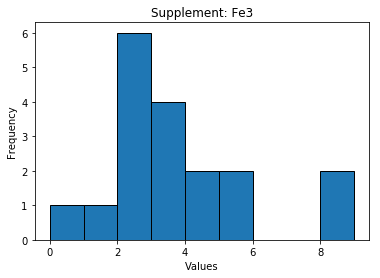

Mean: 3.69888887471623
Variance: 3.895298517760538
Median: 3.475000023841855


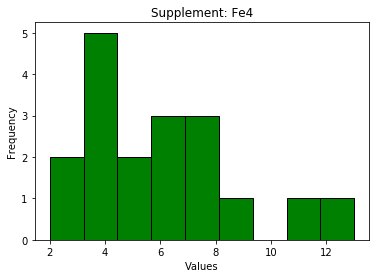

Mean: 5.936666581365796
Variance: 7.440332756872544
Median: 5.75


In [4]:
# Setting parameters for the histogram describing supplement Fe3

plt.hist(fe3_np, 9, (fe3_lb,fe3_ub), edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Supplement: Fe3')
plt.show()

# Calculating mean, variance and median of supplement Fe3

fe3_mean = np.mean(fe3_np)
fe3_var = np.var(fe3_np)
fe3_median = np.median(fe3_np)

print("Mean:", fe3_mean)
print("Variance:", fe3_var)
print("Median:", fe3_median)

# Setting parameters for the histogram describing supplement Fe4

plt.hist(fe4_np, 9, (fe4_lb,fe4_ub), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Supplement: Fe4')
plt.show()

# Calculating mean, variance and median of supplement Fe4

fe4_mean = np.mean(fe4_np)
fe4_var = np.var(fe4_np)
fe4_median = np.median(fe4_np)

print("Mean:", fe4_mean)
print("Variance:", fe4_var)
print("Median:", fe4_median)

## Task 2

For each group try to find probability density function (based on histogram) and distribution function (based on ecdf).

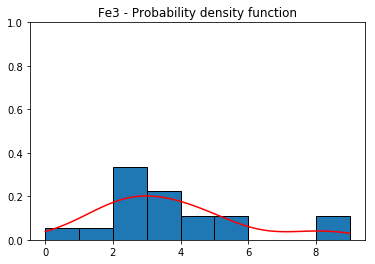

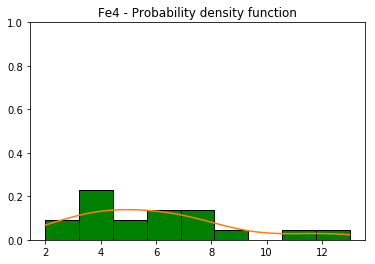

In [5]:
# Non-parametric probability density function of Fe3

nparam_density = stats.kde.gaussian_kde(fe3.loc[:,'Iron'].values.ravel())
x = np.linspace(fe3_lb, fe3_ub)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(fe3.loc[:,'Iron'].values, 9, (fe3_lb,fe3_ub), density=True, edgecolor = 'black')
ax.plot(x, nparam_density, color = 'r')
ax.set_ylim([0, 1])
plt.title('Fe3 - Probability density function')
plt.show()

# Non-parametric probability density function of Fe4

nparam_density = stats.kde.gaussian_kde(fe4.loc[:,'Iron'].values.ravel())
x = np.linspace(fe4_lb, fe4_ub)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(fe4.loc[:,'Iron'].values, 9, (fe4_lb,fe4_ub), density=True, facecolor = 'g', edgecolor = 'black')
ax.plot(x, nparam_density)
ax.set_ylim([0, 1])
plt.title('Fe4 - Probability density function')
plt.show()

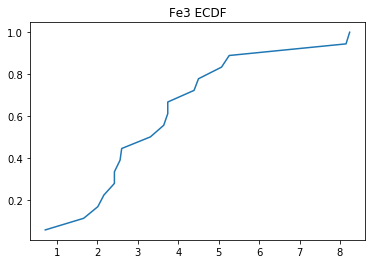

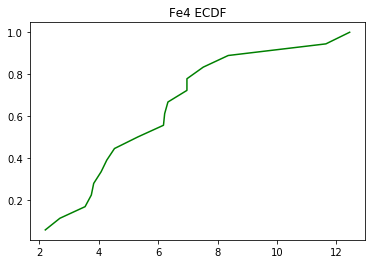

In [6]:
# Empiric distribution function fo Fe3

ecdf = ECDF(fe3_np)
plt.plot(ecdf.x, ecdf.y)
plt.title('Fe3 ECDF')
plt.show()

# Empiric distribution function fo Fe4

ecdf = ECDF(fe4_np)
plt.plot(ecdf.x, ecdf.y, color = 'g')
plt.title('Fe4 ECDF')
plt.show()